<a href="https://colab.research.google.com/github/2AMissinou/Metabolomics-Filtering/blob/main/Metabolic_Features_Filtering_PCoA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='	dodgerblue'> Metabolic features Clean up **<font>

---

Authors: Anani Amegan Missinou (anani.a.missinou@gmail.com) <br>
Input file format: .csv files or .txt files <br>
Outputs: .csv files  <br>
Dependencies: ggplot2, dplyr, ecodist, vegan, svglite\

In [ ]:
#installing and calling the necessary packages:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("ecodist") #for PCoA using Bray Curtis distance
install.packages("vegan") #for PermANOVA
install.packages("svglite") # for saving ggplots as svg files
install.packages("ape")

In [ ]:
# Load fuctions from require packages
require("ggplot2")
require("dplyr")
require("ecodist")
require("vegan")
require("svglite")
library('ape')

## 1. Goals of ordination
Ordination is a collective term for multivariate techniques which summarize a multidimensional dataset in such a way that when it is projected onto a low dimensional space, any intrinsic pattern the data may possess becomes apparent upon visual inspection (Pielou, 1984).

In [ ]:
# Load the community dataset which we`ll use in the examples today
data(varespec)

# Open the dataset and look if you can find any patterns
View(varespec)
# It is probably very difficult to see any patterns by just looking at the data frame!

In [3]:
#nft <- read.csv("220725_disturb_MZmine_POS_MS1-2_NonBlanked_NonGapFilled_4R.csv", header = T, check.names = F)
ft <- read.csv("Brassinet_Roots_Quant_Dec 2021.csv", header = T, check.names = F)
md <- read.csv("Brassinet_Roots_metadata_Dec 2021.csv", header = T, check.names = F)

In [4]:
# Working dierctorycreation and setting of the output
mkdirs <- function(fp) {
    if(!file.exists(fp)) {
        mkdirs(dirname(fp))
        dir.create(fp)
    }
} 

mkdirs("E:/IGEPP-UMR 1349 INRAE/BRASSIMET-project/output_data")
setwd("E:/IGEPP-UMR 1349 INRAE/BRASSIMET-project/output_data")

In [5]:
#Removing Peak area extensions
colnames(ft) <- gsub(' Sample','',colnames(ft))
#colnames(nft) <- gsub(' Sample','',colnames(nft))
md$filename<- gsub(' Sample','',md$filename)

#Removing if any NA columns present in the md file
ft <- ft[,colSums(is.na(ft))<nrow(ft)]
#nft <- nft[,colSums(is.na(nft))<nrow(nft)]
md <- md[,colSums(is.na(md))<nrow(md)]

#Changing the row names of the files
rownames(md) <- md$filename
md <- md[,-1]
rownames(ft) <- paste(ft$'row ID',round(ft$'row m/z',digits = 3),round(ft$'row retention time',digits = 3), sep = '_')
#rownames(nft) <- paste(nft$'row ID',round(nft$'row m/z',digits = 3),round(nft$'row retention time',digits = 3), sep = '_')

#Picking only the files with column names containing 'mzML'
ft <- ft[,grep('mzXML',colnames(ft))]
#nft <- nft[,grep('mzML',colnames(nft))]

# Converting replicate attributes into factors (categorical data)
md$ATTRIBUTE_replicates <- as.factor(md$ATTRIBUTE_replicates)

In [6]:
input_data <- t(ft)

In [7]:
head(input_data)
dim(input_data)

,2_Neg_477.065_4.52,3_Neg_112.986_0.74,4_Neg_133.014_0.71,8_Neg_420.046_2.93,9_Neg_439.085_0.68,11_Neg_174.956_0.56,12_Neg_288.937_0.56,13_Neg_446.046_4.52,14_Neg_115.004_0.71,15_Neg_377.086_0.66,⋯,4187_Pos_677.104_2.71,4322_Pos_350.218_3.63,4356_Pos_362.15_14.51,4371_Pos_415.153_7.43,4421_Pos_418.171_5.51,4727_Pos_759.176_4.38,4782_Pos_783.198_5.66,4790_Pos_357.081_2.2,4987_Pos_413.1_6.23,5043_Pos_337.09_3.08
Aviso_232_CuCl2_Block2.mzXML,0.312,0.177,0.105,0.1250,0.0111,0.0369,0.0309,0.0383,0.0315,0.0301,⋯,0.000544,0.000308,0.000330,3.72e-04,0.000256,2.83e-04,0.000500,0.000308,0.000864,0.001160
Aviso_233_CuCl2_Block2.mzXML,0.270,0.158,0.110,0.1430,0.0165,0.0382,0.0286,0.0326,0.0221,0.0340,⋯,0.000215,0.000181,0.000100,1.27e-04,0.000216,1.14e-03,0.000139,0.000268,0.000632,0.000608
Aviso_280_CuCl2_Block3.mzXML,0.259,0.192,0.119,0.1670,0.0227,0.0311,0.0312,0.0336,0.0251,0.0516,⋯,0.000222,0.000360,0.000167,5.25e-04,0.000210,5.78e-03,0.000153,0.000489,0.000459,0.001110
Chifu_187_CuCl2_Block1.mzXML,0.422,0.266,0.102,0.0121,0.0149,0.0531,0.0398,0.0612,0.0232,0.0169,⋯,0.000143,0.000974,0.000840,7.07e-04,0.000168,3.27e-04,0.000190,0.000173,0.000391,0.000253
Chifu_231_CuCl2_Block2.mzXML,0.394,0.177,0.138,0.0483,0.0250,0.0423,0.0415,0.0526,0.0349,0.0332,⋯,0.000294,0.001100,0.000263,2.04e-04,0.000484,8.88e-05,0.000547,0.000220,0.000900,0.001120
Chifu_279_CuCl2_Block3.mzXML,0.376,0.211,0.160,0.0561,0.0201,0.0436,0.0377,0.0532,0.0489,0.0270,⋯,0.000129,0.000353,0.000239,9.45e-05,0.000193,6.31e-04,0.000194,0.000210,0.000410,0.000866


[1]  138 3086

In [8]:
varespec = input_data 

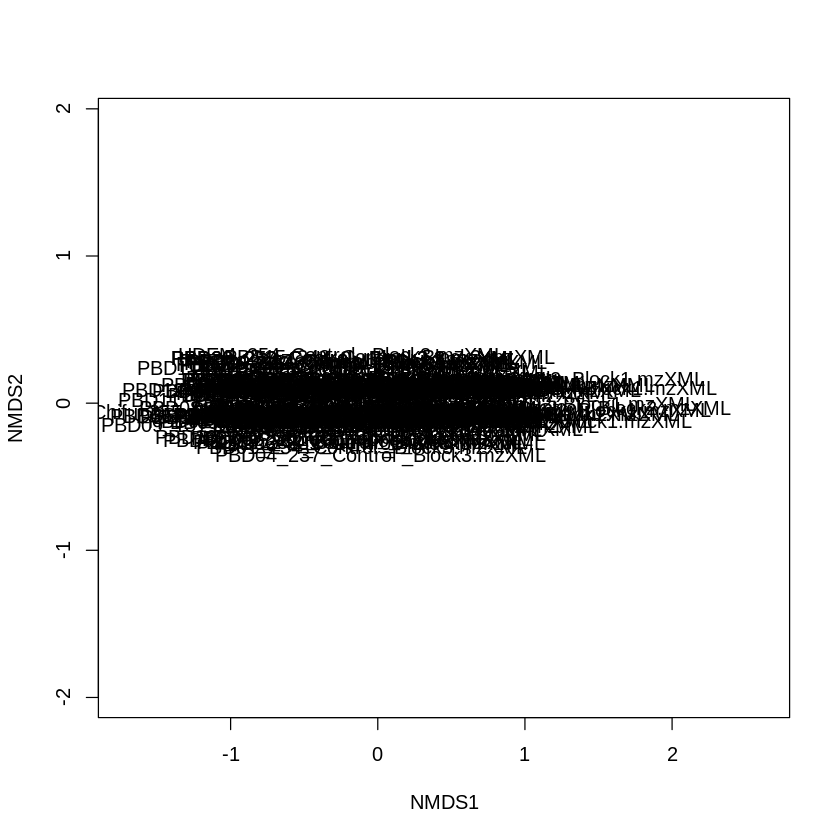

In [9]:
# With this command, you`ll perform a NMDS and plot the results
varespec %>%
  metaMDS(trace = F) %>%
  ordiplot(type = "none") %>%
  text("sites")

## 2a. Principal Component Analysis (PCA)
PCA uses a rotation of the original axes to derive new axes, which maximize the variance in the data set. 

Computationally, PCA is an eigenanalysis. The most important consequences of this are:

There is a unique solution to the eigenanalysis.


1.   The axes (also called principal components or PC) are orthogonal to each other (and thus independent).
2.   The axes (also called principal components or PC) are orthogonal to each other (and thus independent).
3.   Each PC is associated with an eigenvalue. The sum of the eigenvalues will equal the sum of the variance of all variables in the data set. The eigenvalues represent the variance extracted by each PC, and are often expressed as a percentage of the sum of all eigenvalues (i.e. total variance). The relative eigenvalues thus tell how much variation that a PC is able to ‘explain’.
4.   Axes are ranked by their eigenvalues. Thus, the first axis has the highest eigenvalue and thus explains the most variance, the second axis has the second highest eigenvalue, etc.
5.   There are a potentially large number of axes (usually, the number of samples minus one, or the number of species minus one, whichever is less) so there is no need to specify the dimensionality in advance. However, the number of dimensions worth interpreting is usually very low.
6.   Species and samples are ordinated simultaneously, and can hence both be represented on the same ordination diagram (if this is done, it is termed a biplot)
7.   The variable loadings of the original variables on the PCA’s may be understood as how much each variable ‘contributed’ to building a PC. The absolute value of the loadings should be considered as the signs are arbitrary.


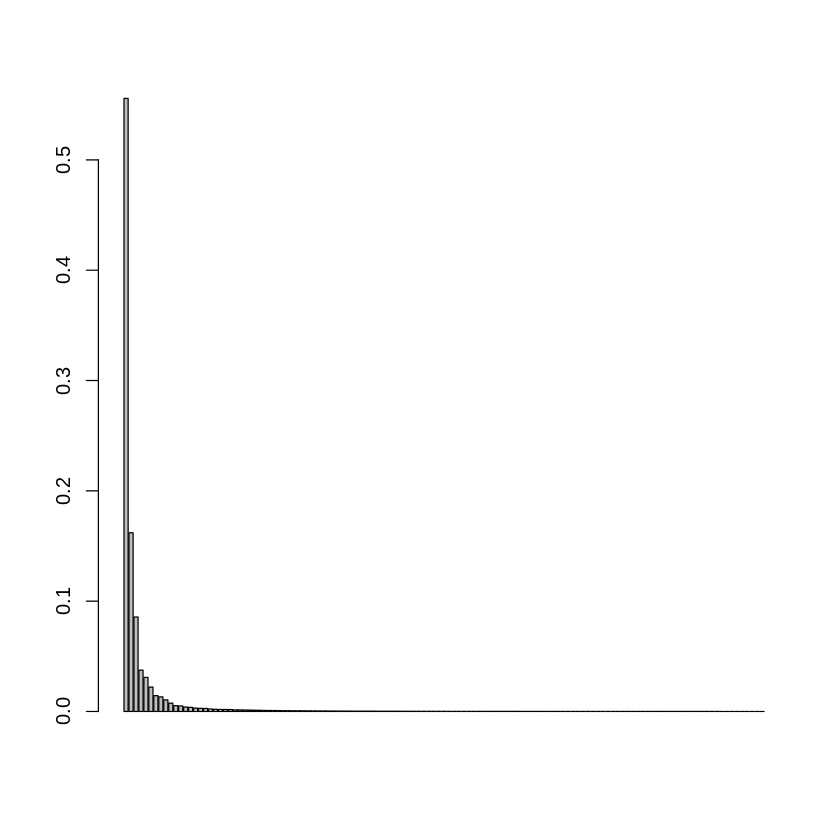

In [10]:
PCA <- rda(varespec, scale = FALSE)
# Use scale = TRUE if your variables are on different scales (e.g. for abiotic variables).
# Here, all species are measured on the same scale 
# So use scale = FALSE

# Now plot a bar plot of relative eigenvalues. This is the percentage variance explained by each axis
barplot(as.vector(PCA$CA$eig)/sum(PCA$CA$eig)) 
# How much of the variance in our dataset is explained by the first principal component?

[1] 0.717718

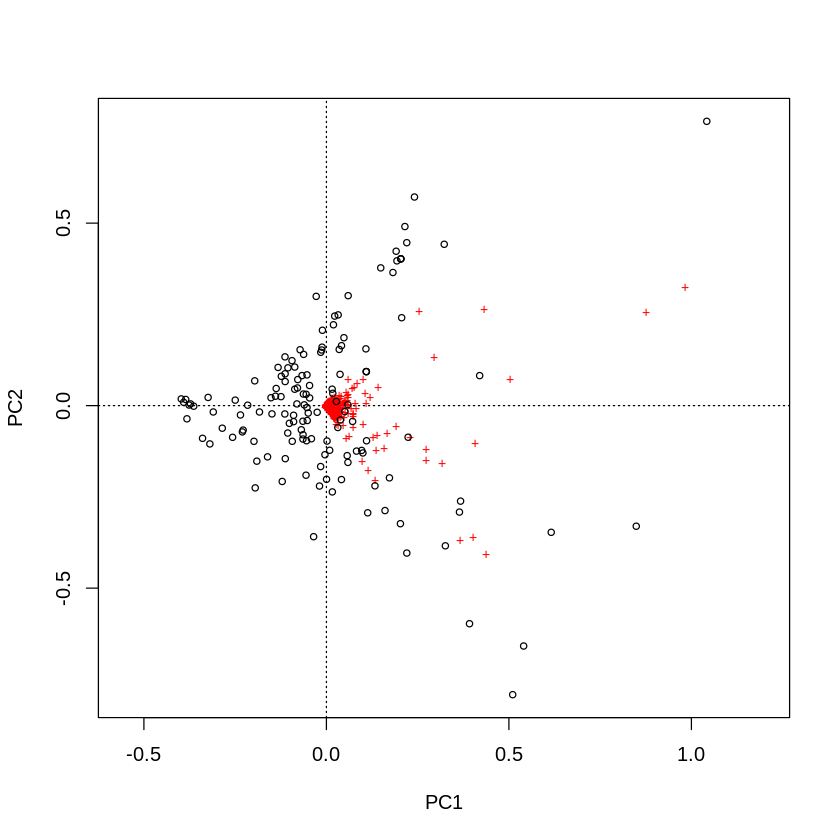

In [11]:

# Calculate the percent of variance explained by first two axes
sum((as.vector(PCA$CA$eig)/sum(PCA$CA$eig))[1:2]) # 79%, this is ok.
# Also try to do it for the first three axes

# Now, we`ll plot our results with the plot function
plot(PCA)

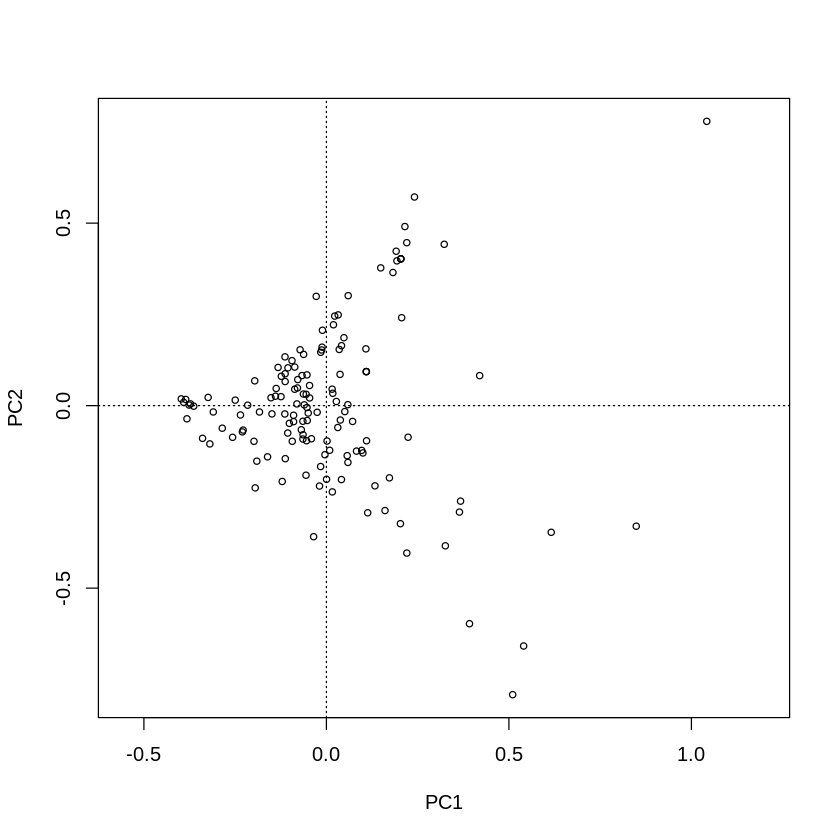

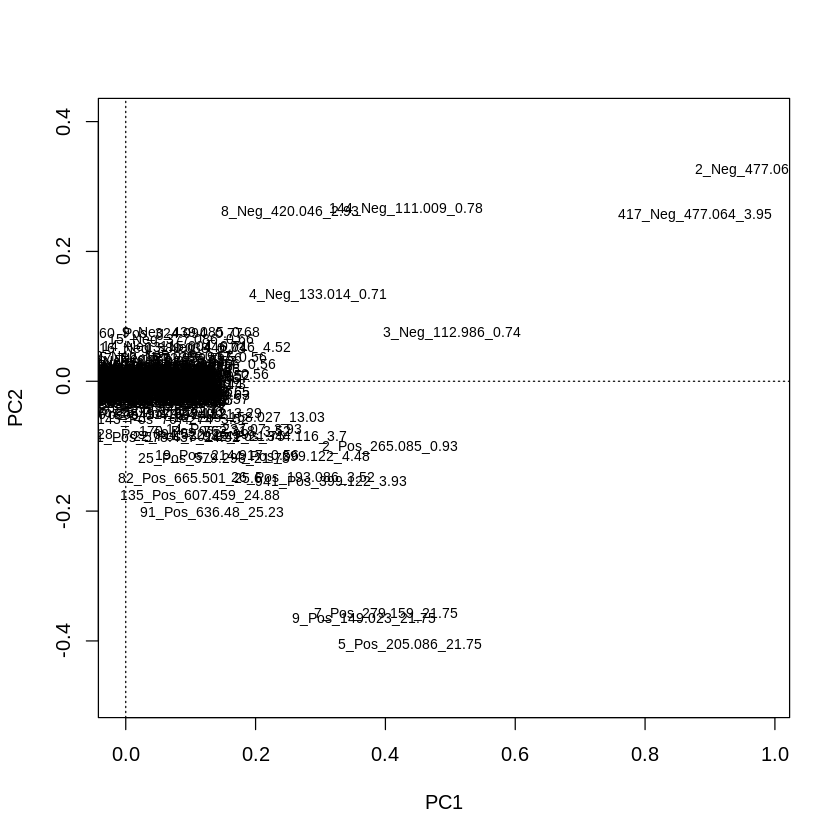

In [12]:
plot(PCA, display = "sites", type = "points")
plot(PCA, display = "species", type = "text")

Warning message in arrows(0, 0, g$species[, 1] * arrlen, g$species[, 2] * arrlen, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, g$species[, 1] * arrlen, g$species[, 2] * arrlen, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, g$species[, 1] * arrlen, g$species[, 2] * arrlen, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, g$species[, 1] * arrlen, g$species[, 2] * arrlen, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, g$species[, 1] * arrlen, g$species[, 2] * arrlen, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, g$species[, 1] * arrlen, g$species[, 2] * arrlen, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, g$species[, 1] * arrlen, g$species[, 2] * arrlen, :
“zero-length arrow is of indeterminate angle a

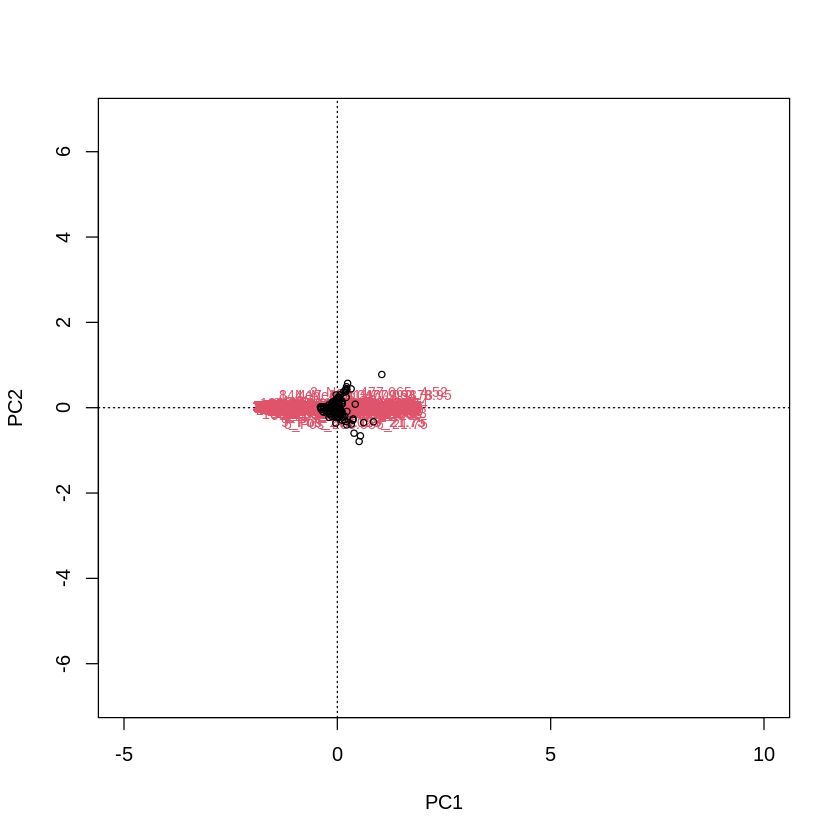

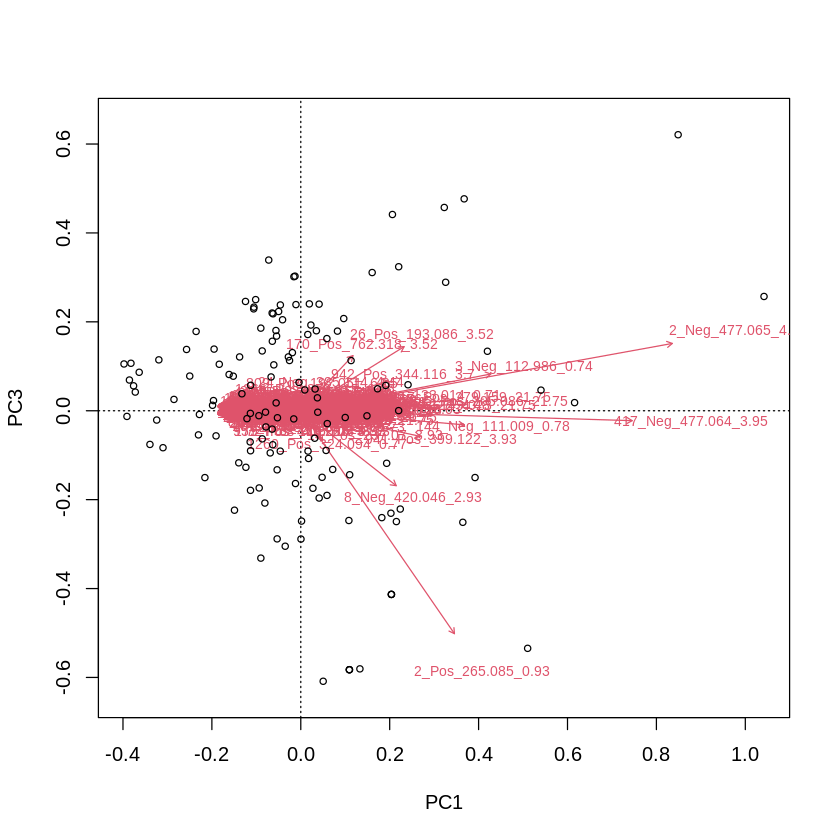

In [13]:
# You can extract the species and site scores on the new PC for further analyses:
sitePCA <- PCA$CA$u # Site scores
speciesPCA <- PCA$CA$v # Species scores

# In a biplot of a PCA, species' scores are drawn as arrows 
# that point in the direction of increasing values for that variable
biplot(PCA, choices = c(1,2), type = c("text", "points"), xlim = c(-5,10)) # biplot of axis 1 vs 2
biplot(PCA, choices = c(1,3), type = c("text","points")) # biplot of axis 1 vs 3

In [27]:
# Check out the help file how to pimp your biplot further:
#?biplot.rda

# You can even go beyond that, and use the ggbiplot package.
# You can install this package by running:
library(devtools)
#install_github("vqv/ggbiplot")
library(ggbiplot)

##2b. Principal Coordinate Analysis (PCoA)
Principal coordinates analysis (PCoA, also known as metric multidimensional scaling) attempts to represent the distances between samples in a low-dimensional, Euclidean space. In particular, it maximizes the linear correlation between the distances in the distance matrix, and the distances in a space of low dimension (typically, 2 or 3 axes are selected). 

Although PCoA is based on a (dis)similarity matrix, the solution can be found by eigenanalysis. The interpretation of the results is the same as with PCA.

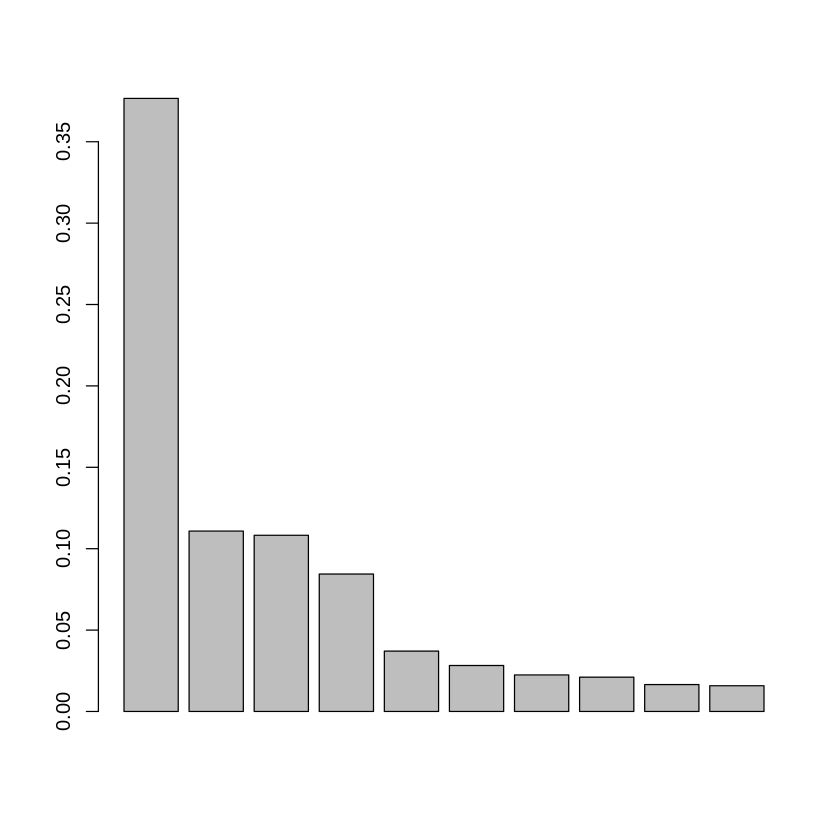

In [28]:
# First step is to calculate a distance matrix. 
# Here we use Bray-Curtis distance metric
dist <- vegdist(varespec,  method = "bray")

# PCoA is not included in vegan. 
# We will use the ape package instead
library(ape)
PCOA <- pcoa(dist)

# plot the eigenvalues and interpret
barplot(PCOA$values$Relative_eig[1:10])
# Can you also calculate the cumulative explained variance of the first 3 axes?

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8,

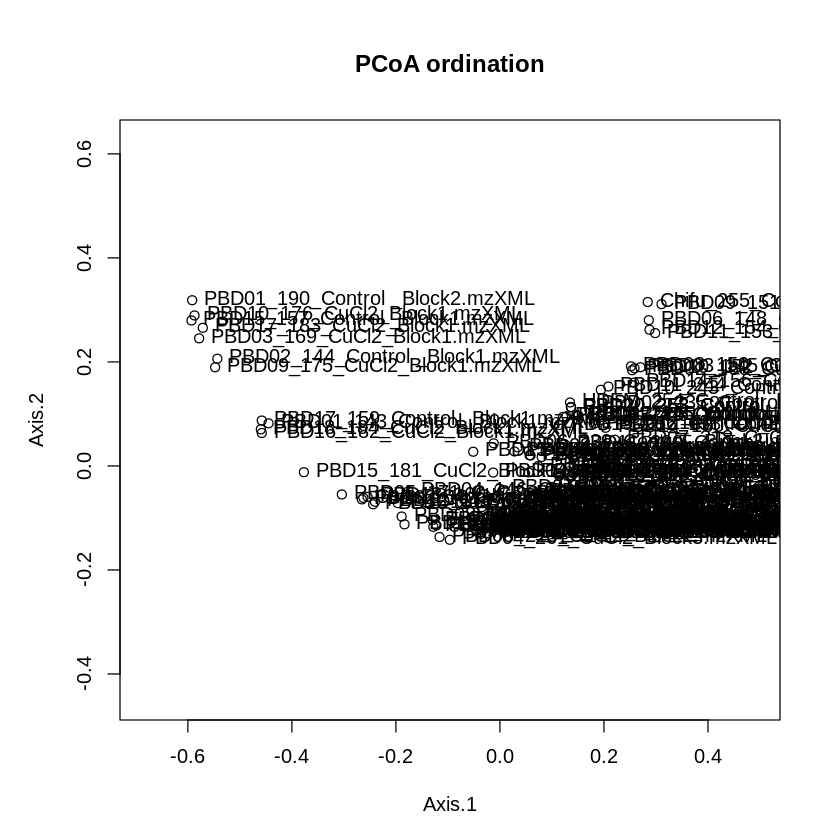

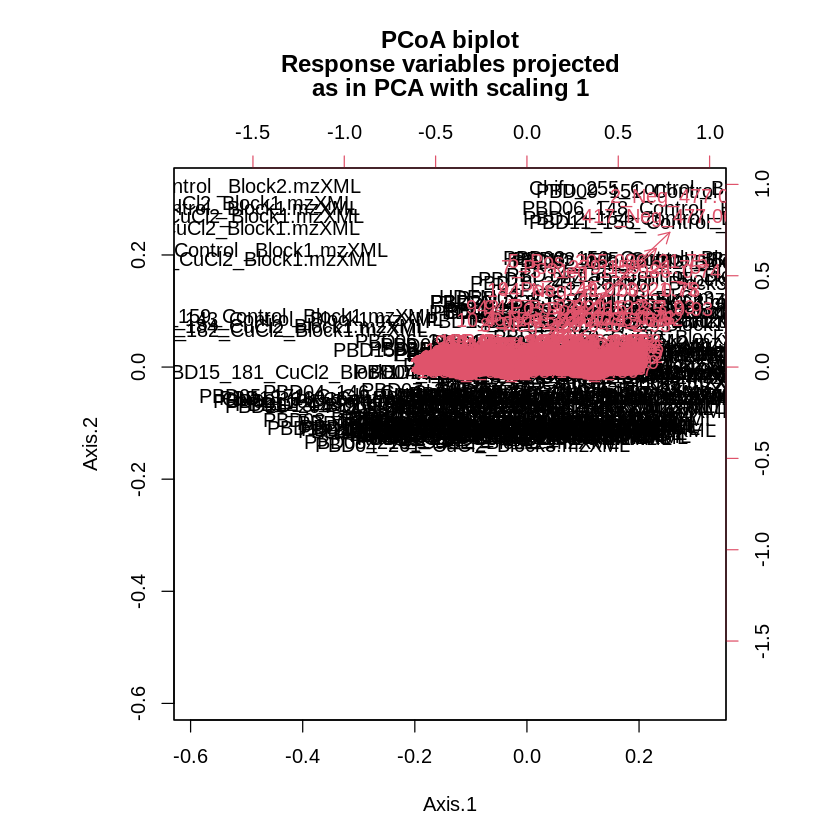

In [29]:
# Some distance measures may result in negative eigenvalues. In that case, add a correction:
PCOA <- pcoa(dist, correction = "cailliez")

# Plot your results
biplot.pcoa(PCOA)

# You see what`s missing? 
# Indeed, there are no species plotted on this biplot. 
# That's because we used a dissimilarity matrix (sites x sites) 
# as input for the PCOA function. 
# Hence, no species scores could be calculated. 
#However, we could work around this problem like this:
biplot.pcoa(PCOA, varespec)

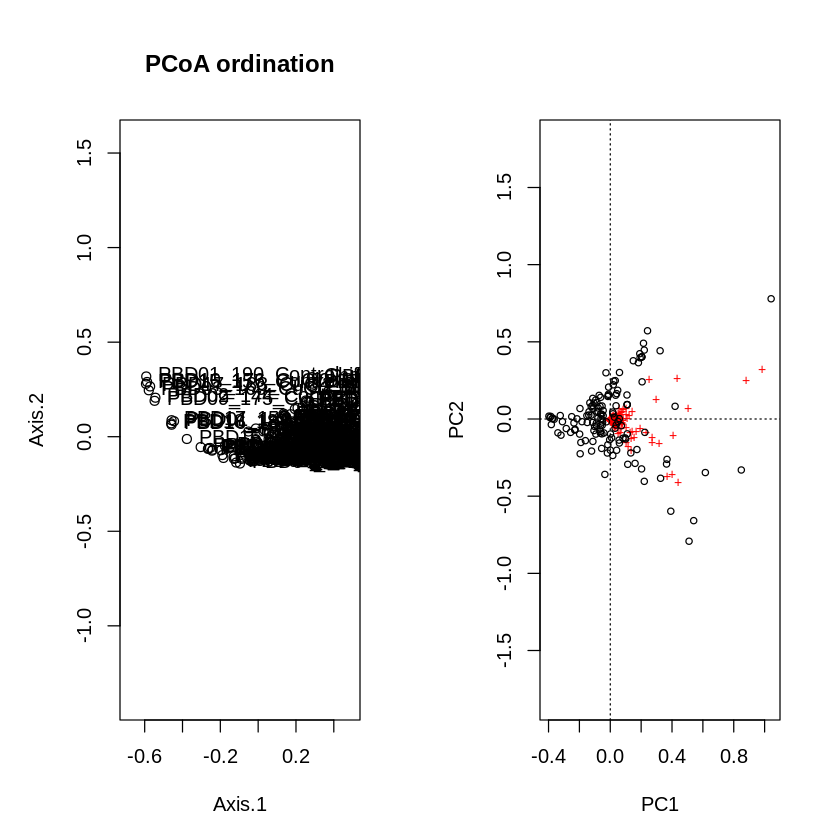

In [30]:
# Extract the plot scores from first two PCoA axes (if you need them):
PCOAaxes <- PCOA$vectors[,c(1,2)]

# Compare this result with the PCA plot
par(mfrow = c(1, 2)) 
biplot.pcoa(PCOA)
plot(PCA)

# reset plot window
par(mfrow = c(1, 1)) 

## 2c. Non-metric Multidimensional Scaling (NMDS)
NMDS attempts to represent the pairwise dissimilarity between objects in a low-dimensional space. Any dissimilarity coefficient or distance measure may be used to build the distance matrix used as input. __NMDS is a rank-based approach.


This means that the original distance data is substituted with ranks. Thus, rather than object A being 2.1 units distant from object B and 4.4 units distant from object C, object C is the “first” most distant from object A while object C is the “second” most distant. While information about the magnitude of distances is lost, rank-based methods are generally more robust to data which do not have an identifiable distribution.

NMDS is an iterative algorithm. NMDS routines often begin by random placement of data objects in ordination space. The algorithm then begins to refine this placement by an iterative process, attempting to find an ordination in which ordinated object distances closely match the order of object dissimilarities in the original distance matrix. The stress value reflects how well the ordination summarizes the observed distances among the samples.

NMDS is not an eigenanalysis. This has three important consequences:


1.   There is no unique ordination result
2.   The axes of the ordination are not ordered according to the variance they explain
3.   The number of dimensions of the low-dimensional space must be specified before running the analysis

There is no unique solution. The end solution depends on the random placement of the objects in the first step. Running the NMDS algorithm multiple times to ensure that the ordination is stable is necessary, as any one run may get “trapped” in local optima which are not representative of true distances. Note: this automatically done with the metaMDS() in vegan.

Axes are not ordered in NMDS. metaMDS() in vegan automatically rotates the final result of the NMDS using PCA to make axis 1 correspond to the greatest variance among the NMDS sample points. This doesn’t change the interpretation, cannot be modified, and is a good idea, but you should be aware of it.

A plot of stress (a measure of goodness-of-fit) vs. dimensionality can be used to assess the proper choice of dimensions. The stress values themselves can be used as an indicator. Stress values >0.2 are generally poor and potentially uninterpretable, whereas values <0.1 are good and <0.05 are excellent, leaving little danger of misinterpretation. Stress values between 0.1 and 0.2 are useable but some of the distances will be misleading. Finding the inflexion point can instruct the selection of a minimum number of dimensions.

### Methodology of NMDS:

Step 1: Perform NMDS with 1 to 10 dimensions <br>
Step 2: Check the stress vs dimension plot <br>
Step 3: Choose optimal number of dimensions <br>
Step 4: Perform final NMDS with that number of dimensions <br>
Step 5: Check for convergent solution and final stress <br>

In [31]:
# First step is to calculate a distance matrix. See PCOA for more information about the distance measures
# Here we use bray-curtis distance, which is recommended for abundance data
dist <- vegdist(varespec,  method = "bray")

# In this part, we define a function NMDS.scree() that automatically 
# performs a NMDS for 1-10 dimensions and plots the nr of dimensions vs the stress
NMDS.scree <- function(x) { #where x is the name of the data frame variable
  plot(rep(1, 10), replicate(10, metaMDS(x, autotransform = F, k = 1)$stress), xlim = c(1, 10),ylim = c(0, 0.30), xlab = "# of Dimensions", ylab = "Stress", main = "NMDS stress plot")
  for (i in 1:10) {
    points(rep(i + 1,10),replicate(10, metaMDS(x, autotransform = F, k = i + 1)$stress))
  }
}

Run 0 stress 0.1872165 
Run 1 stress 0.4282271 
Run 2 stress 0.4144438 
Run 3 stress 0.422068 
Run 4 stress 0.4140638 
Run 5 stress 0.573027 
Run 6 stress 0.41447 
Run 7 stress 0.4006543 
Run 8 stress 0.3550584 
Run 9 stress 0.4152545 
Run 10 stress 0.4279927 
Run 11 stress 0.4232787 
Run 12 stress 0.4242826 
Run 13 stress 0.4171566 
Run 14 stress 0.5729869 
Run 15 stress 0.4187082 
Run 16 stress 0.5730601 
Run 17 stress 0.3213727 
Run 18 stress 0.3909848 
Run 19 stress 0.4035043 
Run 20 stress 0.3899582 
*** No convergence -- monoMDS stopping criteria:
     3: stress ratio > sratmax
    17: scale factor of the gradient < sfgrmin
Run 0 stress 0.1872165 
Run 1 stress 0.3948383 
Run 2 stress 0.5730573 
Run 3 stress 0.3718916 
Run 4 stress 0.3545847 
Run 5 stress 0.5729929 
Run 6 stress 0.4139564 
Run 7 stress 0.3946528 
Run 8 stress 0.4297201 
Run 9 stress 0.2838286 
Run 10 stress 0.2632951 
Run 11 stress 0.4046861 
Run 12 stress 0.3732246 
Run 13 stress 0.3445545 
Run 14 stress 0.390671

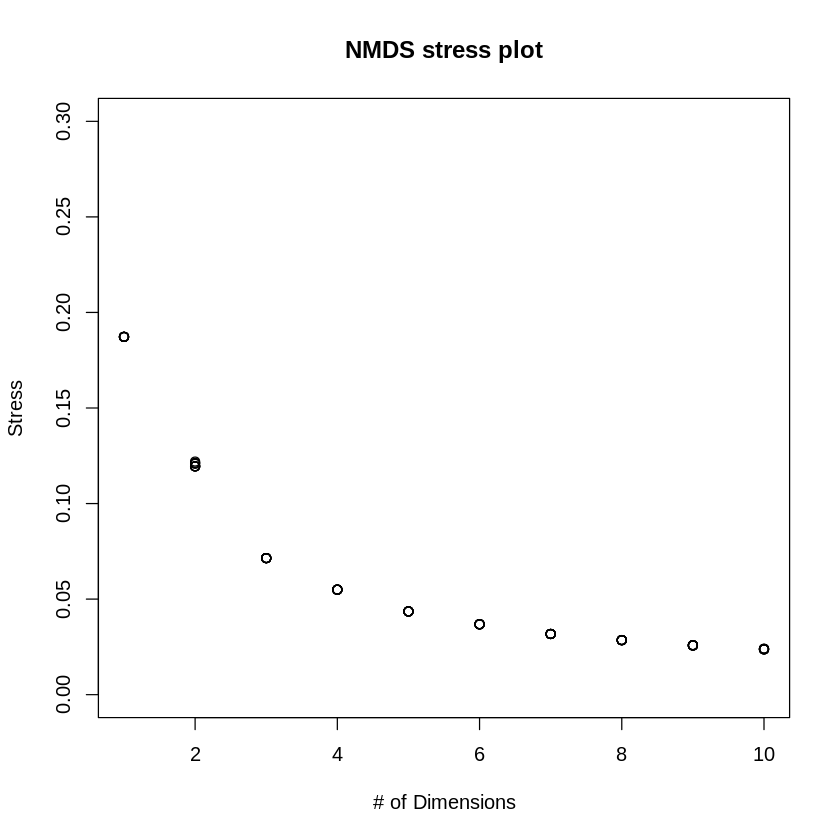

In [32]:
# Use the function that we just defined to choose the optimal nr of dimensions
NMDS.scree(dist)

As a rule of thumb, an NMDS ordination with a stress value around or above 0.2 is deemed suspect and a stress value approaching 0.3 indicates that the ordination is arbitrary. Stress values equal to or below 0.1 are considered fair, while values equal to or below 0.05 indicate good fit.

On this graph, we don´t see a data point for 1 dimension. Do you know what happened? Tip: Run a NMDS (with the function metaNMDS() with one dimension to find out what’s wrong. Then adapt the function above to fix this problem.

We further see on this graph that the stress decreases with the number of dimensions. This is a normal behavior of a stress plot. This graph doesn´t have a very good inflexion point. So here, you would select a nr of dimensions for which the stress meets the criteria. This would be 3-4 D. To make this tutorial easier, let’s select two dimensions. This is also an ok solution. Now, we will perform the final analysis with 2 dimensions

In [33]:
# Because the final result depends on the initial 
# random placement of the points 
# we`ll set a seed to make the results reproducible
set.seed(2)

# Here, we perform the final analysis and check the result
NMDS1 <- metaMDS(dist, k = 2, trymax = 100, trace = F)
# Do you know what the trymax = 100 and trace = F means?
# Let's check the results
NMDS1

# If you don`t provide a dissimilarity matrix, metaMDS automatically applies Bray-Curtis. So in our case, the results would have to be the same
NMDS2 <- metaMDS(varespec, k = 2, trymax = 100, trace = F)
NMDS2


Call:
metaMDS(comm = dist, k = 2, trymax = 100, trace = F) 

global Multidimensional Scaling using monoMDS

Data:     dist 
Distance: bray 

Dimensions: 2 
Stress:     0.1194718 
Stress type 1, weak ties
Two convergent solutions found after 27 tries
Scaling: centring, PC rotation 
Species: scores missing



Call:
metaMDS(comm = varespec, k = 2, trymax = 100, trace = F) 

global Multidimensional Scaling using monoMDS

Data:     varespec 
Distance: bray 

Dimensions: 2 
Stress:     0.1207616 
Stress type 1, weak ties
Two convergent solutions found after 20 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘varespec’ 


The results are not the same! Can you see the reason why? metaMDS() has indeed calculated the Bray-Curtis distances, but first applied a square root transformation on the community matrix. Check the help file for metaNMDS() and try to adapt the function for NMDS2, so that the automatic transformation is turned off.

Let’s check the results of NMDS1 with a stressplot

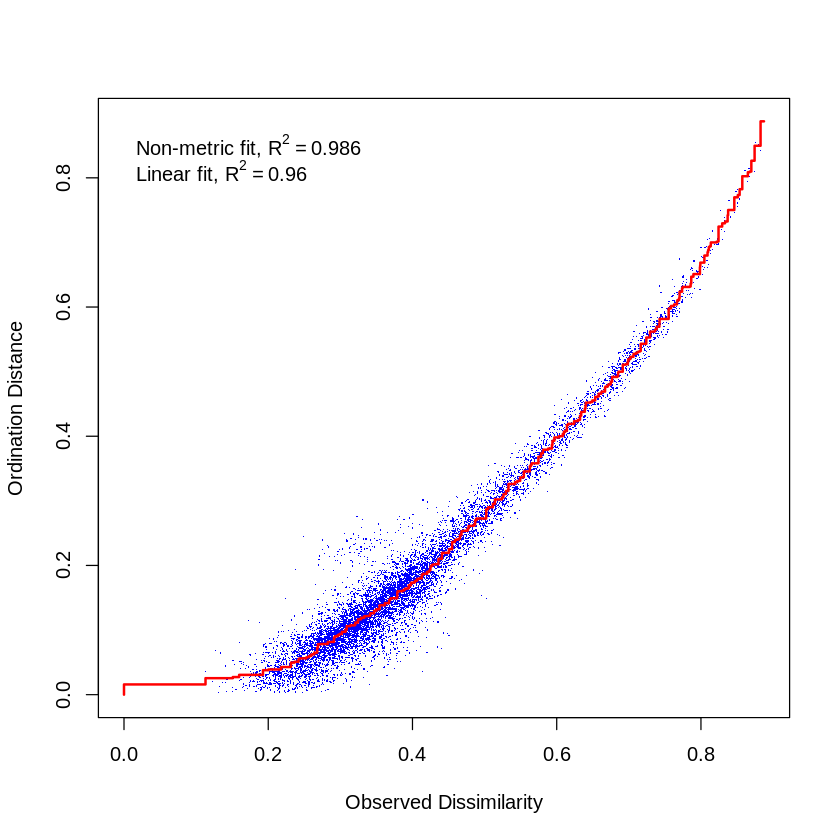

In [34]:
stressplot(NMDS1)

species scores not available



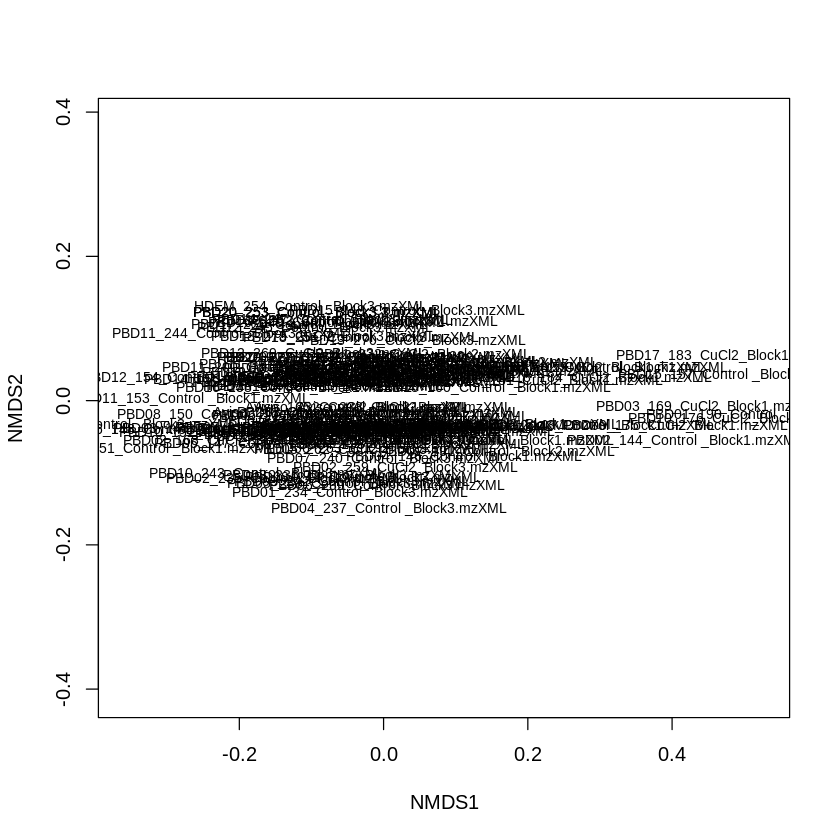

In [35]:
plot(NMDS1, type = "t")

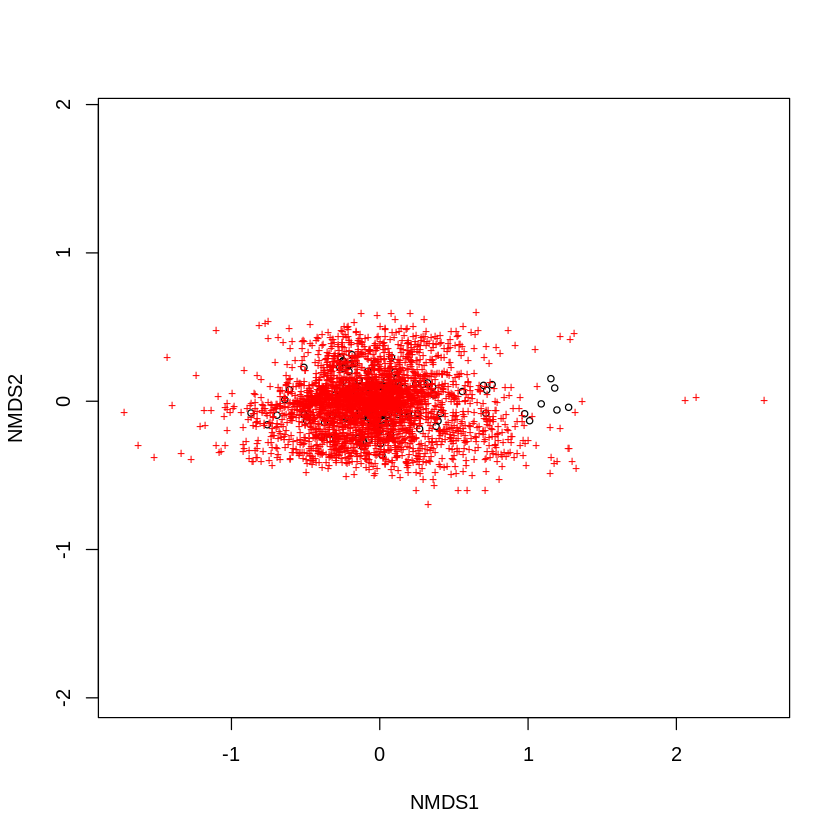

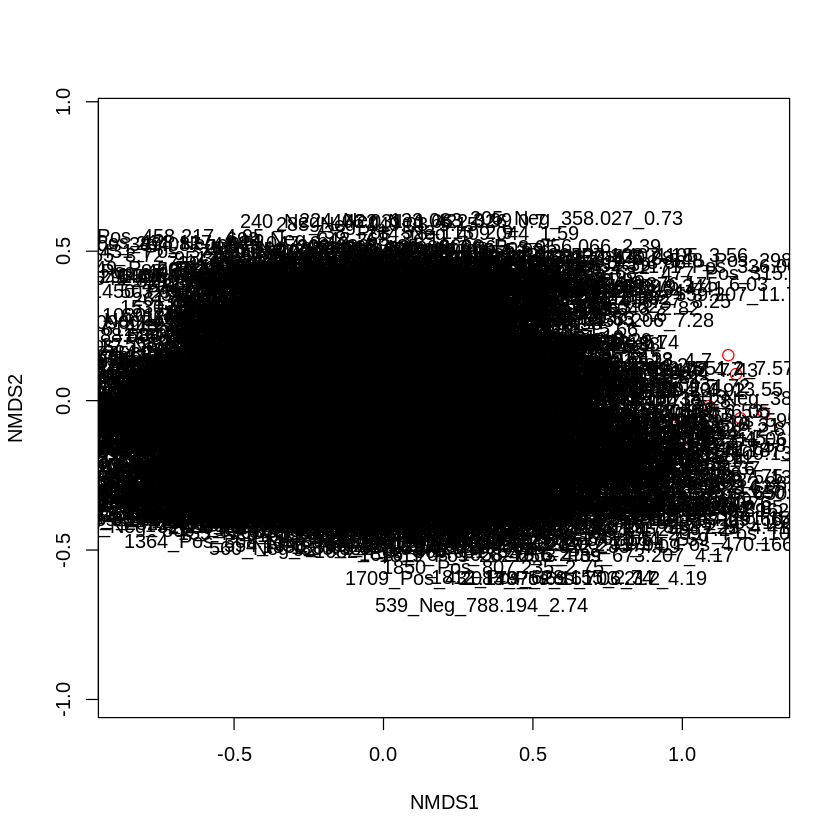

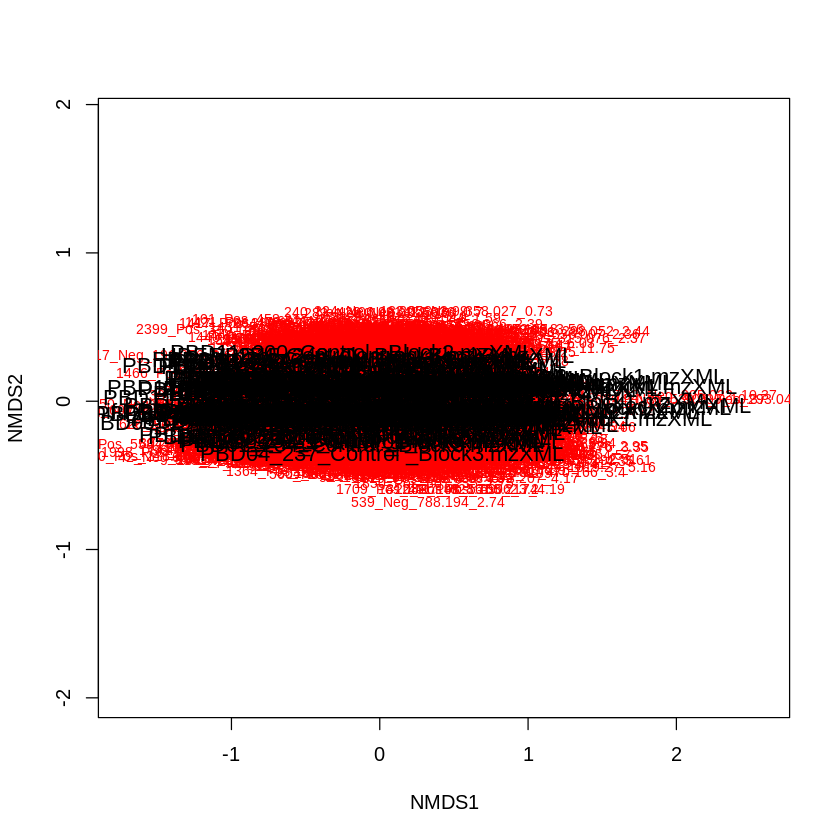

In [36]:
NMDS3 <- metaMDS(varespec, k = 2, trymax = 100, trace = F, autotransform = FALSE, distance="bray")
plot(NMDS3)
plot(NMDS3, display = "sites", type = "n")
points(NMDS3, display = "sites", col = "red", cex = 1.25)
text(NMDS3, display ="species")

# Alternatively, you can use the functions ordiplot and orditorp
ordiplot(NMDS3, type = "n")
orditorp(NMDS3, display = "species", col = "red", air = 0.01)
orditorp(NMDS3, display = "sites", cex = 1.1, air = 0.01)

## 3. Interpretation of the results
We now have a nice ordination plot and we know which plots have a similar species composition. We also know that the first ordination axis corresponds to the largest gradient in our dataset (the gradient that explains the most variance in our data), the second axis to the second biggest gradient and so on. The next question is: Which environmental variable is driving the observed differences in species composition? We can do that by correlating environmental variables with our ordination axes. Therefore, we will use a second dataset with environmental variables (sample by environmental variables). We continue using the results of the NMDS.

In [37]:
# Load the second dataset
data(varechem)

# The function envfit will add the environmental variables as vectors to the ordination plot
ef <- envfit(NMDS3, varechem, permu = 999)
ef

# The two last columns are of interest: the squared correlation coefficient and the associated p-value
# Plot the vectors of the significant correlations and interpret the plot
plot(NMDS3, type = "t", display = "sites")
plot(ef, p.max = 0.05)

Warning message in complete.cases(X) & complete.cases(env):
“longer object length is not a multiple of shorter object length”


ERROR: ignored

In [32]:
varechem

,N,P,K,Ca,Mg,S,Al,Fe,Mn,Zn,Mo,Baresoil,Humdepth,pH
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,19.8,42.1,139.9,519.4,90.0,32.3,39.0,40.9,58.1,4.5,0.30,43.90,2.2,2.7
15,13.4,39.1,167.3,356.7,70.7,35.2,88.1,39.0,52.4,5.4,0.30,23.60,2.2,2.8
24,20.2,67.7,207.1,973.3,209.1,58.1,138.0,35.4,32.1,16.8,0.80,21.20,2.0,3.0
27,20.6,60.8,233.7,834.0,127.2,40.7,15.4,4.4,132.0,10.7,0.20,18.70,2.9,2.8
23,23.8,54.5,180.6,777.0,125.8,39.5,24.2,3.0,50.1,6.6,0.30,46.00,3.0,2.7
19,22.8,40.9,171.4,691.8,151.4,40.8,104.8,17.6,43.6,9.1,0.40,40.50,3.8,2.7
22,26.6,36.7,171.4,738.6,94.9,33.8,20.7,2.5,77.6,7.4,0.30,23.00,2.8,2.8
16,24.2,31.0,138.2,394.6,45.3,27.1,74.2,9.8,24.4,5.2,0.30,29.80,2.0,2.8
28,29.8,73.5,260.0,748.6,105.3,42.5,17.9,2.4,106.6,9.3,0.30,17.60,3.0,2.8


It´s easy as that. Next, let’s say that the we have two groups of samples. This could be the result of a classification or just two predefined groups (e.g. old versus young forests or two treatments). Now, we want to see the two groups on the ordination plot. Here is how you do it:

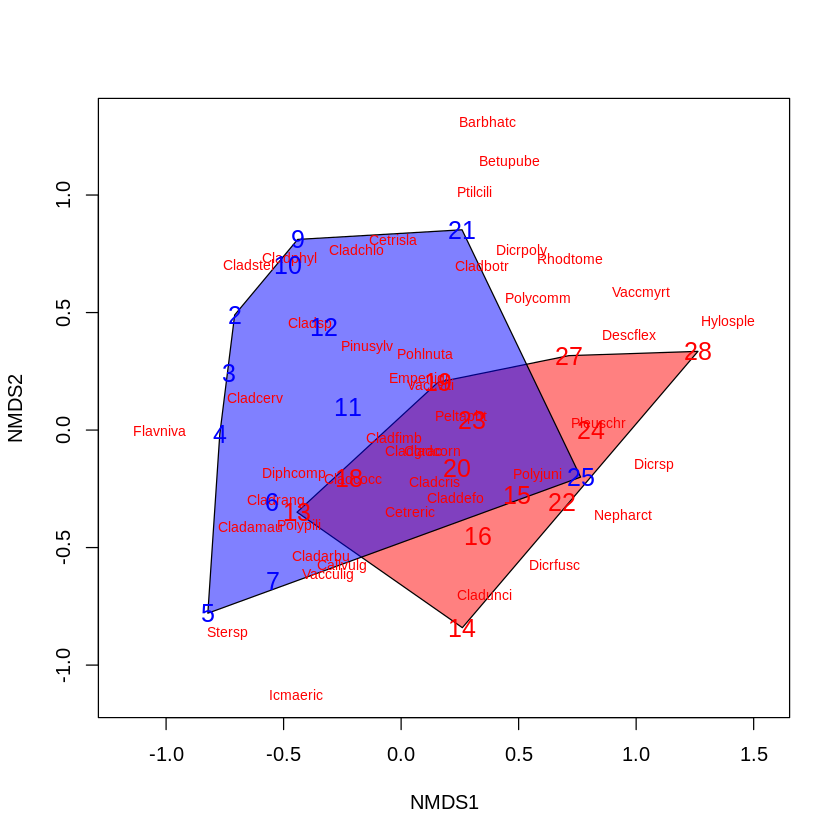

In [33]:
# Define a group variable (first 12 samples belong to group 1, last 12 samples to group 2)
group = c(rep("Group1", 12), rep("Group2", 12))

# Create a vector of color values with same length as the vector of group values
colors = c(rep("red", 12), rep("blue", 12))

# Plot convex hulls with colors based on the group identity
ordiplot(NMDS3, type = "n")
for(i in unique(group)) {
  ordihull(NMDS3$point[grep(i, group),], draw="polygon",
   groups = group[group == i],col = colors[grep(i,group)],label=F) } 

orditorp(NMDS3, display = "species", col = "red", air = 0.01)
orditorp(NMDS3, display = "sites", col = c(rep("red",12),
  rep("blue", 12)), air = 0.01, cex = 1.25)

In [40]:
head(input_data)
head(md)

,2_Neg_477.065_4.52,3_Neg_112.986_0.74,4_Neg_133.014_0.71,8_Neg_420.046_2.93,9_Neg_439.085_0.68,11_Neg_174.956_0.56,12_Neg_288.937_0.56,13_Neg_446.046_4.52,14_Neg_115.004_0.71,15_Neg_377.086_0.66,⋯,4187_Pos_677.104_2.71,4322_Pos_350.218_3.63,4356_Pos_362.15_14.51,4371_Pos_415.153_7.43,4421_Pos_418.171_5.51,4727_Pos_759.176_4.38,4782_Pos_783.198_5.66,4790_Pos_357.081_2.2,4987_Pos_413.1_6.23,5043_Pos_337.09_3.08
Aviso_232_CuCl2_Block2.mzXML,0.312,0.177,0.105,0.1250,0.0111,0.0369,0.0309,0.0383,0.0315,0.0301,⋯,0.000544,0.000308,0.000330,3.72e-04,0.000256,2.83e-04,0.000500,0.000308,0.000864,0.001160
Aviso_233_CuCl2_Block2.mzXML,0.270,0.158,0.110,0.1430,0.0165,0.0382,0.0286,0.0326,0.0221,0.0340,⋯,0.000215,0.000181,0.000100,1.27e-04,0.000216,1.14e-03,0.000139,0.000268,0.000632,0.000608
Aviso_280_CuCl2_Block3.mzXML,0.259,0.192,0.119,0.1670,0.0227,0.0311,0.0312,0.0336,0.0251,0.0516,⋯,0.000222,0.000360,0.000167,5.25e-04,0.000210,5.78e-03,0.000153,0.000489,0.000459,0.001110
Chifu_187_CuCl2_Block1.mzXML,0.422,0.266,0.102,0.0121,0.0149,0.0531,0.0398,0.0612,0.0232,0.0169,⋯,0.000143,0.000974,0.000840,7.07e-04,0.000168,3.27e-04,0.000190,0.000173,0.000391,0.000253
Chifu_231_CuCl2_Block2.mzXML,0.394,0.177,0.138,0.0483,0.0250,0.0423,0.0415,0.0526,0.0349,0.0332,⋯,0.000294,0.001100,0.000263,2.04e-04,0.000484,8.88e-05,0.000547,0.000220,0.000900,0.001120
Chifu_279_CuCl2_Block3.mzXML,0.376,0.211,0.160,0.0561,0.0201,0.0436,0.0377,0.0532,0.0489,0.0270,⋯,0.000129,0.000353,0.000239,9.45e-05,0.000193,6.31e-04,0.000194,0.000210,0.000410,0.000866


,ATTRIBUTE_accession,ATTRIBUTE_SampleType,ATTRIBUTE_sampleNumber,ATTRIBUTE_treatment,ATTRIBUTE_replicates,ATTRIBUTE_Condition,Accessions,Treatment,Sample_code,Aviso-H2O_CuCl2,⋯,Aviso-PBD16_CuCl2,Aviso-PBD16_H2O,Aviso-PBD17_CuCl2,Aviso-PBD17_H2O,Aviso-PBD18_CuCl2,Aviso-PBD18_H2O,Aviso-PBD19_CuCl2,Aviso-PBD19_H2O,Aviso-PBD20_CuCl2,Aviso-PBD20_H2O
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Aviso_232_CuCl2_Block2.mzXML,Aviso,With_Treatment,232,CuCl2,2,CuCl2-induced stress,Aviso,CuCl2,Aviso_232_CuCl2_B2,Aviso_CuCl2,⋯,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,
Aviso_233_CuCl2_Block2.mzXML,Aviso,With_Treatment,233,CuCl2,2,CuCl2-induced stress,Aviso,CuCl2,Aviso_233_CuCl2_B2,Aviso_CuCl2,⋯,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,
Aviso_280_CuCl2_Block3.mzXML,Aviso,With_Treatment,280,CuCl2,3,CuCl2-induced stress,Aviso,CuCl2,Aviso_280_CuCl2_B3,Aviso_CuCl2,⋯,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,
Chifu_187_CuCl2_Block1.mzXML,Chifu,With_Treatment,187,CuCl2,1,CuCl2-induced stress,Chifu,CuCl2,Chifu_187_CuCl2_B1,,⋯,,,,,,,,,,
Chifu_231_CuCl2_Block2.mzXML,Chifu,With_Treatment,231,CuCl2,2,CuCl2-induced stress,Chifu,CuCl2,Chifu_231_CuCl2_B2,,⋯,,,,,,,,,,
Chifu_279_CuCl2_Block3.mzXML,Chifu,With_Treatment,279,CuCl2,3,CuCl2-induced stress,Chifu,CuCl2,Chifu_279_CuCl2_B3,,⋯,,,,,,,,,,


In [43]:
library(vegan)
#data(dune)   ## load community data
#data(dune.env)

dune = input_data
dune.env = md
dune.dist <- vegdist(dune, method="bray")

In [47]:
# default test by terms
dune.div <- adonis2(dune ~ ATTRIBUTE_accession*ATTRIBUTE_treatment, data = dune.env, permutations = 999, method="bray")
dune.div

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ATTRIBUTE_accession,22,4.3136035,0.35801338,3.119489,0.001
ATTRIBUTE_treatment,1,0.5478428,0.04546895,8.716094,0.001
ATTRIBUTE_accession:ATTRIBUTE_treatment,22,1.4046924,0.11658435,1.015838,0.445
Residual,92,5.7825827,0.47993331,NA,NA
Total,137,12.0487213,1.00000000,NA,NA


In [48]:
# overall tests
adonis2(dune ~ ATTRIBUTE_accession*ATTRIBUTE_treatment, data = dune.env, permutations = 999, method="bray", by = NULL)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model,45,6.266139,0.5200667,2.215407,0.001
Residual,92,5.782583,0.4799333,NA,NA
Total,137,12.048721,1.0000000,NA,NA



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df  Sum Sq  Mean Sq     F N.Perm Pr(>F)
Groups     22 0.42397 0.019271 1.306    999  0.188
Residuals 115 1.69698 0.014756                    

Warning message in chol.default(cov, pivot = TRUE):
“the matrix is either rank-deficient or indefinite”


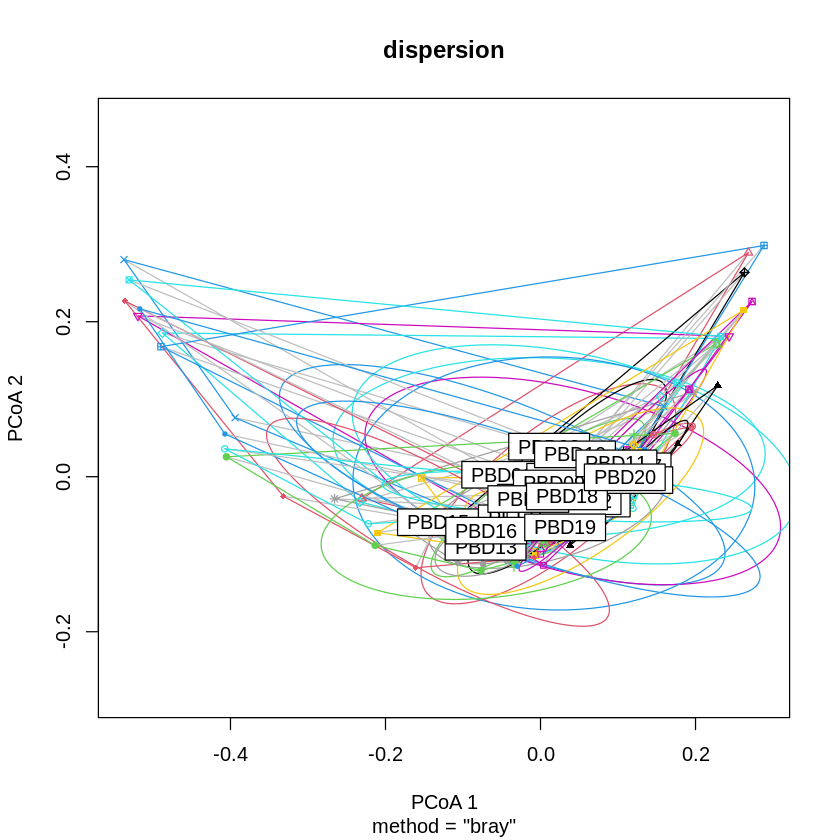

In [50]:
# Analysis of multivariate homogeneity of group dispersions (variances). Used as a measure of multivariate beta diversity. 
#Bedadisper is a multivariate analogue of Levene’s test for homogeneity of variances. 
dispersion <- betadisper(dune.dist, group=dune.env$ATTRIBUTE_accession)
permutest(dispersion)
plot(dispersion, hull=TRUE, ellipse=TRUE) ##sd ellipse

In [51]:
??plot